In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import sem

np.set_printoptions(precision=10, suppress=True)

mpl.rcParams.update({'font.size': 25})
mpl.rcParams.update({'font.family': 'Arial'})

FONT_BG = 25

mpl.rcParams['pdf.fonttype'] = 42 # allow text of pdf to be edited in illustrator

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

mattar_col = '#279641'
model_col = '#16bbc7'
data_col = '#c70c15'

### Fig 4b, preferences in behavior and replay in the Carey task

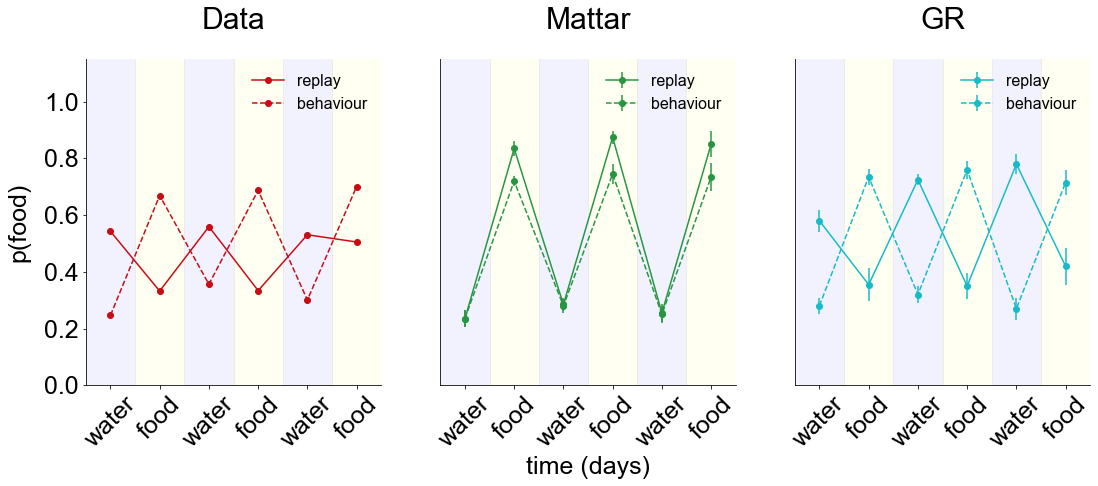

In [2]:
# Graphics params
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
face_alpha = 0.05
titlepad = 30
ylim = 1.15

gr_fn = './Data/carey/GR/GR.npz'
mattar_fn = './Data/carey/mattar/Q.npz'

### Real data
behav_filename = './Data/carey/real_data/behaviour.csv'
replay_filename = './Data/carey/real_data/replay.csv'

behav_vals = []
replay_vals = []

with open(behav_filename, 'r') as f:
    for line in f:
        vals = line.split(', ')
        behav_vals.append(float(vals[-1]))
        
with open(replay_filename, 'r') as f:
    for line in f:
        vals = line.split(', ')
        replay_vals.append(float(vals[-1]))
        
# Plot them both
ax = axes[0]
num_sessions = 6
replay_line = ax.plot(replay_vals, color=data_col, label='replay', marker='o')
behav_line = ax.plot(behav_vals, color=data_col, label='behaviour', marker='o', linestyle='--')
ax.set_ylim(0, ylim)
ax.set_ylabel('p(food)', labelpad=14)

xlabels = ['water' if i % 2 == 0 else 'food' for i in range(num_sessions)]
ax.set_xticks(ticks=np.arange(num_sessions))
ax.set_xticklabels(labels=xlabels, rotation=45)
ax.set_xlim(-0.5, num_sessions - 0.5)
ax.set_title('Data', pad=titlepad)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 2.0], [0.0, 0.0], color='blue', alpha=face_alpha)
    else:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 12.0], [0.0, 0.0], color='yellow', alpha=face_alpha)

lns = replay_line + behav_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, prop={'size': 16})

### Mattar
d = np.load(mattar_fn, allow_pickle=True)

posto = d['posto']
posto = posto[:, :, :] # filter reward term from replays
choices = d['choices']
state_traj = d['state_trajs']
rewards = d['rewards']
sess_seq = d['sess_seq']

num_arms = 2
arm_length = 2
start_to_choice = 2
goal_states = start_to_choice + np.arange(num_arms) * arm_length + (arm_length - 1)

# Check behaviour per day
num_mice = choices.shape[0]
num_sessions = choices.shape[1]
num_trials = choices.shape[2]

behav_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):

    for i in range(num_sessions):
        sess_choices = choices[mouse, i]
        behav_p_food[mouse, i] = np.sum(sess_choices) / len(sess_choices)
        
# Check proportion of replays that are food over time
replay_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for session in range(num_sessions):
        for trial in range(num_trials):
            trial_replay = posto[mouse, session, trial]
            trial_replay_states = np.hstack((trial_replay[:, 0], trial_replay[:, 2]))
            if goal_states[1] in trial_replay or goal_states[1] - 1 in trial_replay:
                replay_p_food[mouse, session] += 1
    
replay_p_food /= num_trials
        
# Plot them both
num_sessions = 6
ax = axes[1]
ax.errorbar(np.arange(num_sessions), np.mean(replay_p_food, axis=0)[:num_sessions], color=mattar_col, 
             yerr=sem(replay_p_food, axis=0)[:num_sessions],
             label='replay', marker='o')
ax.errorbar(np.arange(num_sessions), np.mean(behav_p_food, axis=0)[:num_sessions], color=mattar_col, 
             yerr=sem(behav_p_food, axis=0)[:num_sessions],
             label='behaviour', marker='o', linestyle='--')
ax.set_ylim(0, ylim)
xlabels = ['water' if i % 2 == 0 else 'food' for i in range(num_sessions)]
ax.set_xticks(ticks=np.arange(num_sessions))
ax.set_xticklabels(labels=xlabels, rotation=45)
ax.set_xlim(-0.5, num_sessions - 0.5)
ax.set_yticks([])
ax.set_xlabel('time (days)')

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 2.0], [0.0, 0.0], color='blue', alpha=face_alpha)
    else:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 2.0], [0.0, 0.0], color='yellow', alpha=face_alpha)

# plt.axhline(0.5, color='white', linestyle='--')

ax.legend(prop={'size': 16}, frameon=False)
ax.set_title('Mattar', pad=titlepad)


### GR
d = np.load(gr_fn, allow_pickle=True)

posto = d['posto']
choices = d['choices']
state_traj = d['state_trajs']
rewards = d['rewards']
sess_seq = d['sess_seq']

num_arms = 2
arm_length = 2
start_to_choice = 2
goal_states = start_to_choice + np.arange(num_arms) * arm_length + (arm_length - 1)

## Check behaviour per day
num_mice = choices.shape[0]
num_sessions = choices.shape[1]
num_trials = choices.shape[2]

behav_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for i in range(num_sessions):
        sess_choices = choices[mouse, i]
        behav_p_food[mouse, i] = np.sum(sess_choices) / len(sess_choices)
        
## Check proportion of replays that are food over time
replay_p_food = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for session in range(num_sessions):
        for trial in range(num_trials):
            trial_replay = posto[mouse, session, trial]
            trial_replay = np.hstack((trial_replay[:, 0], trial_replay[:, 2]))
            if goal_states[1] in trial_replay or goal_states[1] - 1 in trial_replay:
                replay_p_food[mouse, session] += 1
    
replay_p_food /= num_trials

replay_p_water = np.zeros((num_mice, num_sessions))
for mouse in range(num_mice):
    for session in range(num_sessions):
        for trial in range(num_trials):
            trial_replay = posto[mouse, session, trial]
            trial_replay = np.hstack((trial_replay[:, 0], trial_replay[:, 2]))
            if goal_states[0] in trial_replay or goal_states[0] - 1 in trial_replay:
                replay_p_water[mouse, session] += 1
    
replay_p_water /= num_trials
        
## Plot them both
ax = axes[2]
num_sessions = 6
ax.errorbar(np.arange(num_sessions), np.mean(replay_p_food, axis=0)[:num_sessions], color=model_col,
             yerr=sem(replay_p_food, axis=0)[:num_sessions],
             label='replay', marker='o')
ax.errorbar(np.arange(num_sessions), np.mean(behav_p_food, axis=0)[:num_sessions], color=model_col, 
             yerr=sem(behav_p_food, axis=0)[:num_sessions],
             label='behaviour', linestyle='--', marker='o')

ax.set_ylim(0, ylim)
ax.set_yticks([])
xlabels = ['water' if i % 2 == 0 else 'food' for i in range(num_sessions)]
ax.set_xticks(ticks=np.arange(num_sessions))
ax.set_xticklabels(labels=xlabels, rotation=45)
ax.set_xlim(-0.5, num_sessions - 0.5)

# Shading
for i in range(num_sessions):
    if i % 2 == 0:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 2.0], [0.0, 0.0], color='blue', alpha=face_alpha)
    else:
        ax.fill_between([i - 0.5, i + 0.5], [2.0, 12.0], [0.0, 0.0], color='yellow', alpha=face_alpha)

ax.legend(prop={'size': 16}, frameon=False)
ax.set_title('GR', pad=titlepad)
fig.savefig('./figs/fig4/all_together_adjusted.pdf', transparent=True)